In [2]:
from FaceNormalization  import *
from FaceLandmark import *

In [3]:
def mesh_latest():
        left_eye = [
            226,
            247,
            247,
            30,
            30,
            29,
            29,
            27,
            27,
            28,
            28,
            56,
            56,
            190,
            190,
            244,
            244,
            112,
            112,
            26,
            26,
            22,
            22,
            23,
            23,
            24,
            24,
            110,
            110,
            25,
            25,
            226,
        ]
        right_eye = [
            463,
            414,
            414,
            286,
            286,
            258,
            258,
            257,
            257,
            259,
            259,
            260,
            260,
            467,
            467,
            446,
            446,
            255,
            255,
            339,
            339,
            254,
            254,
            253,
            253,
            252,
            252,
            256,
            256,
            341,
        ]
        full_mesh_connection = mp.solutions.face_mesh.FACEMESH_TESSELATION

        r_eye_mesh_connection = mp.solutions.face_mesh.FACEMESH_LEFT_EYE
        l_eye_mesh_connection = mp.solutions.face_mesh.FACEMESH_RIGHT_EYE

        result = full_mesh_connection - r_eye_mesh_connection - l_eye_mesh_connection
        list_landmarks = []
        for i in result:
            list_landmarks.append(i[0])
            list_landmarks.append(i[1])
        only_landmark_1 = list(set(list_landmarks))
        only_landmark = []
        eyes_ = list(set(right_eye))
        eyes_r = list(set(left_eye))
        for i in only_landmark_1:
            if i in eyes_ or i in eyes_r:
                pass
            else:
                only_landmark.append(i)

        return only_landmark


In [4]:
def get_coordinates(processed_image):
        landmark = mesh_latest()
        x_lan = []
        y_lan = []
        for lan in landmark:
            x_lan.append(processed_image.multi_face_landmarks[0].landmark[lan].x)
            y_lan.append(processed_image.multi_face_landmarks[0].landmark[lan].y)

        x_values = np.array(x_lan)
        y_values = np.array(y_lan)
        return x_values, y_values

[[149, 150], [150, 136], [136, 172], [172, 58], [58, 132], [132, 93], [93, 234], [234, 127], [127, 162], [162, 21], [21, 54], [54, 103], [103, 67], [67, 109], [109, 10], [10, 338], [338, 297], [297, 332], [332, 284], [284, 251], [251, 389], [389, 356], [356, 454], [454, 323], [323, 361], [361, 288], [288, 397], [397, 365], [365, 379], [379, 378], [378, 400], [400, 377], [377, 152], [152, 148], [148, 176], [176, 149]]


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


True

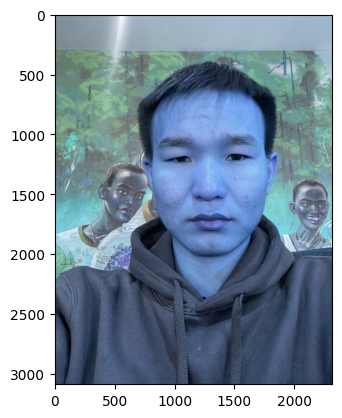

In [11]:

img = cv2.imread("./pic/test.png")
plt.imshow(img)
# img = cv2.resize(img,(img.shape[1]//2,img.shape[0]//2)) 
img = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)  

normal = Normalizatoin()
landmark = FaceLandmark()
results = landmark.process(img)

source = normal.geneate_face_oval_mesh(results.multi_face_landmarks[0].landmark,img)

# plt.imshow(source)
results = landmark.process(source)
x_values, y_values = get_coordinates(results)
src_pts = []
for x, y in zip(x_values, y_values):
            src_pts.append((source.shape[1] * x, source.shape[0] * y))


left = min(src_pts, key=lambda x: x[0])[0]
right = max(src_pts, key=lambda x: x[0])[0]
top = min(src_pts, key=lambda x: x[1])[1]
bottom = max(src_pts, key=lambda x: x[1])[1]
shape_normalized_img = source[
    int(top) : int(bottom), int(left) : int(right)
]
cv2.imwrite("./normal.png",cv2.cvtColor(shape_normalized_img,cv2.COLOR_BGR2RGB))